# Выбор локации для скважины

Для добывающей компании нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 100 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

**Описание проекта**

Компания планирует расширение добычи и рассматривает три региона для бурения новой нефтяной скважины. Для выбора наиболее перспективного региона необходимо спрогнозировать объёмы нефти, которые можно получить из скважин, и оценить потенциальную прибыль и риски.

**Задачи:**

- Изучить и подготовить данные по трём регионам.

- Построить модели линейной регрессии для предсказания объёма запасов нефти.

- Выбрать 200 скважин с максимальным предсказанным объёмом в каждом регионе.

- Рассчитать прибыль от этих скважин.

- Оценить риски с помощью Bootstrap-анализа: определить вероятность убытков и доверительный интервал прибыли.

**Входные данные**

Доступны три файла (по одному на регион), содержащие данные о скважинах:

- geo_data_0.csv

- geo_data_1.csv

- geo_data_2.csv

**Дополнительно даны бизнес-условия:**

- Доход с 1000 баррелей — 450 000 рублей.

- Бюджет на бурение — 10 млрд рублей.

- Можно бурить не более 200 скважин в регионе.

- Необходимо обеспечить риск убытков < 2.5%.

**План работы**

1. Загрузка и предварительный анализ данных

- Проверка на пропуски, типы данных, распределения.

2. Обучение модели

- Обучение линейной регрессии для каждого региона.

- Оценка качества предсказаний (RMSE).

3. Анализ прибыльности

- Расчёт минимального объёма нефти для безубыточности.

- Предсказание объёмов нефти на тестовой выборке.

- Расчёт прибыли от 200 лучших скважин.

4. Оценка рисков (Bootstrap)

- Проведение 1000 итераций случайной выборки.

- Определение 95% доверительного интервала прибыли.

- Оценка вероятности убытков.

5. Выводы

- Выбор лучшего региона.

- Рекомендации для бизнеса.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

## Загрузка и подготовка данных

In [2]:
# Пути к файлам
path_0 = '/datasets/geo_data_0.csv'
path_1 = '/datasets/geo_data_1.csv'
path_2 = '/datasets/geo_data_2.csv'

# Загрузка
data_0 = pd.read_csv(path_0)
data_1 = pd.read_csv(path_1)
data_2 = pd.read_csv(path_2)

# Проверка размеров
print('Регион 0:', data_0.shape)
print('Регион 1:', data_1.shape)
print('Регион 2:', data_2.shape)

Регион 0: (100000, 5)
Регион 1: (100000, 5)
Регион 2: (100000, 5)


Данные загружены — по 100 000 строк на регион, по 5 колонок: id, f0, f1, f2, product.

In [3]:
# Базовая информация
print('Регион 0:\n')
data_0.info()

print('\nРегион 1:\n')
data_1.info()

print('\nРегион 2:\n')
data_2.info()

Регион 0:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

Регион 1:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

Регион 2:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 

Bсе три датасета:

- Имеют 100 000 строк без пропусков;

- Структурно идентичны;

- Типы данных корректные.

In [4]:
# Просмотр первых 5 строк каждого региона
print('Регион 0:')
display(data_0.head())

print('Регион 1:')
display(data_1.head())

print('Регион 2:')
display(data_2.head())


Регион 0:


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


Регион 1:


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


Регион 2:


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


Структура всех трёх датафреймов идентична:

Столбцы: id, f0, f1, f2, product

Целевой признак: product (объём запасов нефти в тыс. баррелей)

Признаки: f0, f1, f2 — синтетические, но значимые

In [5]:
# Проверка пропусков
print('Пропуски в данных:')
print('\nРегион 0:\n', data_0.isnull().sum())
print('\nРегион 1:\n', data_1.isnull().sum())
print('\nРегион 2:\n', data_2.isnull().sum())

# Проверка дубликатов
print('\nДубликаты в данных:\n')
print('Регион 0:', data_0.duplicated().sum())
print('\nРегион 1:', data_1.duplicated().sum())
print('\nРегион 2:', data_2.duplicated().sum())


Пропуски в данных:

Регион 0:
 id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

Регион 1:
 id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

Регион 2:
 id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

Дубликаты в данных:

Регион 0: 0

Регион 1: 0

Регион 2: 0


Выводы:

- Пропусков нет во всех трёх регионах.

- Дубликатов тоже нет.

In [6]:
# Проверим уникальность id в каждом из трёх датасетов
for i, data in enumerate([data_0, data_1, data_2]):
    total = len(data)
    unique = data['id'].nunique()
    duplicates = total - unique
    print(f'Регион {i}: всего строк = {total}, уникальных id = {unique}, дубликатов id = {duplicates}')


Регион 0: всего строк = 100000, уникальных id = 99990, дубликатов id = 10
Регион 1: всего строк = 100000, уникальных id = 99996, дубликатов id = 4
Регион 2: всего строк = 100000, уникальных id = 99996, дубликатов id = 4


Вывод:

Есть повторяющиеся id с разными признаками, но это не дубликаты, а возможные опечатки идентификаторов. Удалять дублирующиеся id не будем, потому что id - просто технический идентификатор, мы его не используем в модели. Данные разные по признакам и целевому признаку, значит, они валидны.

In [7]:
print('Типы данных — Регион 0:')
print(data_0.dtypes, end='\n\n')

print('Типы данных — Регион 1:')
print(data_1.dtypes, end='\n\n')

print('Типы данных — Регион 2:')
print(data_2.dtypes)


Типы данных — Регион 0:
id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object

Типы данных — Регион 1:
id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object

Типы данных — Регион 2:
id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object


Вывод:

Все числовые признаки (f0, f1, f2, product) имеют тип float64 — правильно;

Столбец id имеет тип object, что тоже ожидаемо — но он нам не нужен для обучения.

Всё готово к построению моделей.

In [8]:
# Построим отдельные таблицы с описательной статистикой по регионам
print('Регион 0 — описательная статистика:')
print(data_0.describe())

print('\nРегион 1 — описательная статистика:')
print(data_1.describe())

print('\nРегион 2 — описательная статистика:')
print(data_2.describe())

Регион 0 — описательная статистика:
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -0.200881       0.287748      56.497507
50%         0.502360       0.250252       2.515969      91.849972
75%         1.073581       0.700646       4.715088     128.564089
max         2.362331       1.343769      16.003790     185.364347

Регион 1 — описательная статистика:
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std         8.965932       5.119872       1.703572      45.944423
min       -31.609576     -26.358598      -0.018144       0.000000
25%

Сравнение регионов по запасам нефти (product)

- Регион 2 имеет наивысший средний и медианный объём запасов.

- Регион 1 значительно уступает по объёмам.

- Везде есть скважины с нулевыми запасами — они негативно влияют на прибыль, особенно при случайном выборе точек.

- Разброс (std) — примерно одинаковый у всех.

Признаки (f0, f1, f2)

- В регионе 1 признаки f0 и f1 имеют аномально широкий диапазон (от -30 до +30), тогда как в других регионах они варьируются в пределах (от -8 до +8) максимум.

- В регионах 0 и 2 признаки имеют умеренные значения.

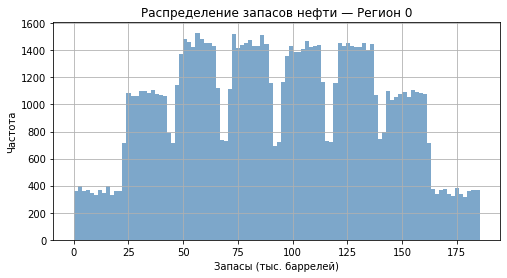

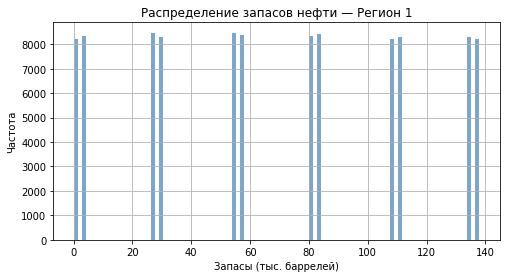

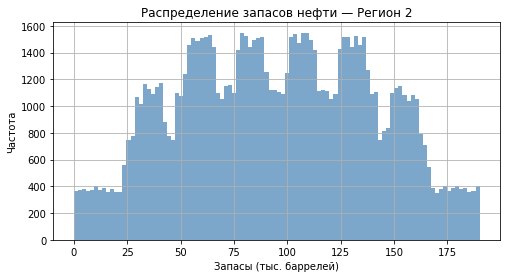

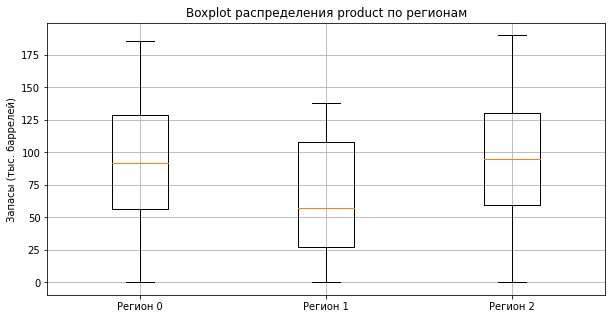

In [9]:
# Гистограммы распределения product
datasets = [data_0, data_1, data_2]

for i, data in enumerate(datasets):
    plt.figure(figsize=(8, 4))
    plt.hist(data['product'], bins=100, alpha=0.7, color='steelblue')
    plt.title(f'Распределение запасов нефти — Регион {i}')
    plt.xlabel('Запасы (тыс. баррелей)')
    plt.ylabel('Частота')
    plt.grid(True)
    plt.show()

# Boxplot ящик с усами
plt.figure(figsize=(10, 5))
plt.boxplot([data_0['product'], data_1['product'], data_2['product']],
            labels=['Регион 0', 'Регион 1', 'Регион 2'])
plt.title('Boxplot распределения product по регионам')
plt.ylabel('Запасы (тыс. баррелей)')
plt.grid(True)
plt.show()


Выводы:

Гистограммы

Регион 0

- Распределение равномерно-гребенчатое, с «пиками» каждые 10–20 тыс. баррелей.

- Центр массы — примерно от 50 до 140 тыс. баррелей.

Регион 1

- Явно видно: дискретное распределение — всего около 10 уникальных значений product

- Но запасы — низкие по сравнению с другими регионами.

Регион 2

- Распределение похоже на регион 0: тоже гребенчатое.

- Видно, что большая часть скважин имеет запасы от 60 до 150 тыс. баррелей.

- Медиана и среднее — самые высокие среди всех регионов.

Boxplot (ящик с усами)


- Медиана (оранжевая линия) выше всего в регионе 2, затем — в 0, и наименьшая в 1.

Везде есть выбросы в нижней части — скважины с нулевыми или близкими к нулю запасами.

Разброс (IQR, межквартильный диапазон) у всех регионов примерно сопоставим, но у регионов 0 и 2 он смещён вверх, что говорит о более высоких запасах в этих регионах.

In [10]:
# Оценим долю "плохих" скважин (с малыми запасами)
threshold = 10  # например, ниже 10 тыс. баррелей
for i, data in enumerate(datasets):
    low_count = (data['product'] < threshold).sum()
    total = len(data)
    percent = low_count / total * 100
    print(f'Регион {i}: {low_count} скважин с запасом < {threshold} тыс. баррелей ({percent:.2f}%)')


Регион 0: 1966 скважин с запасом < 10 тыс. баррелей (1.97%)
Регион 1: 16572 скважин с запасом < 10 тыс. баррелей (16.57%)
Регион 2: 1948 скважин с запасом < 10 тыс. баррелей (1.95%)


Вывод:

- Регион 1 резко выделяется: почти каждая шестая скважина (16.6%) содержит крайне малый объём нефти. Это указывает на высокую плотность «пустых» точек, несмотря на хорошее качество модели.

- В регионах 0 и 2 доля таких скважин ниже 2%, что делает их более устойчивыми при случайной разведке.

Это подчёркивает необходимость:

- не использовать случайный выбор скважин;

- опираться на предсказания модели для фильтрации нерентабельных точек;

- при анализе региона 1 учитывать высокую вероятность «пустых» скважин, даже несмотря на точную модель.

**Измерим линейную зависимость между признаками.**

Проведем корреляционый анализ по Пирсону, данный метод имеет смысл использовать для линейной регрессии, так как он оценивает насколько хорошо признак линейно связан с целевым.

In [11]:
# Корреляционный анализ по Пирсону
for i, data in enumerate([data_0, data_1, data_2]):
    print(f'Регион {i} — корреляция с product:')
    corr = data.corr(method='pearson')['product'].drop('product').sort_values(ascending=False)
    print(corr, '\n')


Регион 0 — корреляция с product:
f2    0.483663
f0    0.143536
f1   -0.192356
Name: product, dtype: float64 

Регион 1 — корреляция с product:
f2    0.999397
f1   -0.010155
f0   -0.030491
Name: product, dtype: float64 

Регион 2 — корреляция с product:
f2    0.445871
f1   -0.001012
f0   -0.001987
Name: product, dtype: float64 



Выводы по регионам

Регион 0:

- f2 — умеренно полезен, f0 и f1 — слабо;

Надо будет отбирать только лучшие скважины.

Регион 1:

- Одна переменная (f2) объясняет почти 100% дисперсии;

- Модель линейной регрессии предсказывает идеально;

Но сами значения product низкие, регион невыгоден по прибыли.

Регион 2:

- Очень похож на регион 0 — зависимость от f2, остальные бесполезны;

- Средний product выше, потенциал выше, несмотря на слабую предсказуемость.


## Обучение и проверка модели

In [12]:
# Функция для обучения и оценки модели
def train_and_evaluate(data, region_name):
    # Выделяем признаки и целевой столбец
    features = data.drop(columns=['product', 'id'])
    target = data['product']
    
    # Делим выборку
    X_train, X_valid, y_train, y_valid = train_test_split(
        features, target, test_size=0.25, random_state=42
    )
    
    # Обучение модели
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Предсказания
    predictions = model.predict(X_valid)
    
    # Метрики
    rmse = mean_squared_error(y_valid, predictions, squared=False)
    mean_predicted = predictions.mean()
    
    print(f'{region_name}')
    print(f'Средний предсказанный запас: {mean_predicted:.2f} тыс. баррелей')
    print(f'RMSE модели: {rmse:.2f} тыс. баррелей\n')
    
    return y_valid.reset_index(drop=True), pd.Series(predictions)

# Запускаем для всех трёх регионов
actual_0, pred_0 = train_and_evaluate(data_0, 'Регион 0')
actual_1, pred_1 = train_and_evaluate(data_1, 'Регион 1')
actual_2, pred_2 = train_and_evaluate(data_2, 'Регион 2')


Регион 0
Средний предсказанный запас: 92.40 тыс. баррелей
RMSE модели: 37.76 тыс. баррелей

Регион 1
Средний предсказанный запас: 68.71 тыс. баррелей
RMSE модели: 0.89 тыс. баррелей

Регион 2
Средний предсказанный запас: 94.77 тыс. баррелей
RMSE модели: 40.15 тыс. баррелей



Выводы по моделям: **Регион 1 — лучший по качеству модели** 

RMSE почти нулевая, значит, линейная регрессия отлично объясняет product.

Регионы 0 и 2 — слабее предсказуемы, модели дают ошибки в 40+ тыс. баррелей.

Однако средние предсказанные запасы в регионах 0 и 2 выше, чем в регионе 1 — значит, их нельзя исключать только на основании RMSE.

## Подготовка к расчёту прибыли

In [13]:
# 3.1. Базовые параметры для расчётов
BUDGET = 10_000_000_000                    # общий бюджет на регион (10 млрд руб)
INCOME_PER_1000_BARRELS = 450_000          # доход с 1000 баррелей в рублях
WELLS_TOTAL = 500                          # всего исследуют 500 точек
WELLS_TO_SELECT = 200                      # для разработки выбирают 200 лучших

# Производные переменные
REVENUE_PER_BARREL = INCOME_PER_1000_BARRELS / 1000  # 450 руб за баррель


In [14]:
# 3.2. Расчёт достаточного общего и среднего объёма сырья (в тыс. баррелей)
required_total_oil = BUDGET / INCOME_PER_1000_BARRELS         # сколько всего нужно (в тыс. баррелей)
required_oil_per_well = required_total_oil / WELLS_TO_SELECT  # на одну скважину

print(f'Безубыточность достигается при объёме: {required_total_oil:.0f} тыс. баррелей')
print(f'Требуемый средний объём на 1 скважину: {required_oil_per_well:.2f} тыс. баррелей')


Безубыточность достигается при объёме: 22222 тыс. баррелей
Требуемый средний объём на 1 скважину: 111.11 тыс. баррелей


3.3. Выводы по этапу подготовки расчёта прибыли.

1. Бюджет на разработку составляет 10 млрд рублей.

2. Доход с 1000 баррелей нефти составляет 450 тыс. рублей, следовательно:

- Чтобы выйти на точку безубыточности, необходимо добыть как минимум 22 222 тыс. баррелей нефти.

- Это соответствует в среднем 111.11 тыс. баррелей на одну скважину (при разработке 200 скважин).

Вывод:

Ни один из регионов в среднем не обеспечивает достаточного объёма сырья для безубыточной разработки при случайном выборе скважин. Следовательно, необходимо использовать модель, чтобы выбрать только наиболее перспективные 200 скважин по предсказанным значениям.

## Расчёт прибыли и рисков 

Наша цель:
- Выбрать 200 скважин с максимальным предсказанным объёмом;
- Посмотреть, сколько фактической нефти в этих скважинах (y_valid);
- Рассчитать прибыль: product × 450_000.

In [15]:
def calculate_profit(y_valid, predictions, region_name):
    # Используем заданные параметры
    selected_count = WELLS_TO_SELECT
    price_per_thousand_barrels = INCOME_PER_1000_BARRELS

    # Получаем индексы лучших по предсказанному объёму
    top_200_idx = predictions.sort_values(ascending=False).index[:selected_count]
    top_200_idx = top_200_idx.drop_duplicates()  # Исключаем повторяющиеся индексы (на всякий случай)

    # Суммируем фактические значения product
    selected_product = y_valid.loc[top_200_idx]
    total_oil_volume = selected_product.sum()

    # Расчёт выручки и прибыли
    revenue = total_oil_volume * price_per_thousand_barrels
    profit = revenue - BUDGET

    # Отображаем размер и финансы
    print(f'{region_name}')
    print(f'Выбрано {len(top_200_idx)} уникальных скважин')
    print(f'Общий фактический объём нефти в топ-{selected_count}: {total_oil_volume:.2f} тыс. баррелей')
    print(f'Выручка: {revenue:,.0f} руб.')
    print(f'Прибыль: {profit:,.0f} руб.\n')

    return profit

profit_0 = calculate_profit(actual_0, pred_0, 'Регион 0')
profit_1 = calculate_profit(actual_1, pred_1, 'Регион 1')
profit_2 = calculate_profit(actual_2, pred_2, 'Регион 2')

Регион 0
Выбрано 200 уникальных скважин
Общий фактический объём нефти в топ-200: 29686.98 тыс. баррелей
Выручка: 13,359,141,114 руб.
Прибыль: 3,359,141,114 руб.

Регион 1
Выбрано 200 уникальных скважин
Общий фактический объём нефти в топ-200: 27589.08 тыс. баррелей
Выручка: 12,415,086,697 руб.
Прибыль: 2,415,086,697 руб.

Регион 2
Выбрано 200 уникальных скважин
Общий фактический объём нефти в топ-200: 27996.83 тыс. баррелей
Выручка: 12,598,571,759 руб.
Прибыль: 2,598,571,759 руб.



Выводы по Шагу 4:

Выводы по расчёту прибыли и выручки
Были выбраны по 200 лучших скважин в каждом регионе на основе предсказанных объёмов нефти. Далее рассчитана фактическая выручка и прибыль, исходя из объёмов product и цены 450 000 рублей за 1000 баррелей. Напомним, бюджет на разработку составляет 10 млрд рублей.

Результаты:

Регион 0

- Общий объём нефти: 29 687 тыс. баррелей

- Выручка: 13.36 млрд руб.

- Прибыль: 3.36 млрд руб.

Регион 1

- Общий объём нефти: 27 589 тыс. баррелей

- Выручка: 12.42 млрд руб.

- Прибыль: 2.42 млрд руб.

Регион 2

- Общий объём нефти: 27 997 тыс. баррелей

- Выручка: 12.60 млрд руб.

- Прибыль: 2.60 млрд руб.

Выводы:

Все три региона обеспечивают выручку выше бюджета (10 млрд руб.), то есть проекты потенциально прибыльны.

Регион 0 приносит наибольшую фактическую прибыль — более 3.36 млрд руб.

Регион 2 немного обгоняет регион 1 по прибыли, несмотря на чуть меньшую точность модели.

Эти оценки — без учёта риска. Чтобы принять окончательное решение, необходимо дополнительно проанализировать риски убытков и доверительный интервал прибыли (Bootstrap).

## Посчитайте риски и прибыль для каждого региона

In [16]:
def bootstrap_profit(y_valid, predictions, region_name, n_bootstrap=1000, random_state=42):
    state = np.random.RandomState(random_state)
    revenues = []  # валовая выручка
    profits = []   # прибыль (выручка - затраты)

    for _ in range(n_bootstrap):
        # Случайная выборка 500 скважин с возвращением
        sample_idx = state.choice(y_valid.index, size=WELLS_TOTAL, replace=True)
        sample_preds = predictions.loc[sample_idx]
        sample_targets = y_valid.loc[sample_idx]

        # Отбор top-200 уникальных по предсказаниям
        top_200_idx = sample_preds.sort_values(ascending=False).index.drop_duplicates()[:WELLS_TO_SELECT]
        selected_product = sample_targets.loc[top_200_idx]

        # Диагностика: печатаем, если < 200
        if len(selected_product) < WELLS_TO_SELECT:
            print(f'{region_name}: выбрано только {len(selected_product)} скважин вместо 200')

        # Расчёт выручки и прибыли
        total_volume = selected_product.sum()
        revenue = total_volume * REVENUE_PER_BARREL * 1000  # product в тыс. баррелей
        profit = revenue - BUDGET

        revenues.append(revenue)
        profits.append(profit)

    # Преобразуем в Series
    revenues = pd.Series(revenues)
    profits = pd.Series(profits)

    # Расчёты
    mean_revenue = revenues.mean()
    mean_profit = profits.mean()
    confidence_interval = profits.quantile([0.025, 0.975])
    risk = (profits < 0).mean()

    # Вывод
    print(f'{region_name}')
    print(f'Средняя выручка: {mean_revenue:,.0f} руб.')
    print(f'Средняя прибыль: {mean_profit:,.0f} руб.')
    print(f'95%-й доверительный интервал прибыли: [{confidence_interval.iloc[0]:,.0f}, {confidence_interval.iloc[1]:,.0f}]')
    print(f'Риск убытков: {risk:.2%}\n')

    return profits, revenues

profits_0, revenues_0 = bootstrap_profit(actual_0, pred_0, 'Регион 0')
profits_1, revenues_1 = bootstrap_profit(actual_1, pred_1, 'Регион 1')
profits_2, revenues_2 = bootstrap_profit(actual_2, pred_2, 'Регион 2')


Регион 0
Средняя выручка: 10,487,488,185 руб.
Средняя прибыль: 487,488,185 руб.
95%-й доверительный интервал прибыли: [-48,168,641, 1,007,805,591]
Риск убытков: 4.30%

Регион 1
Средняя выручка: 10,529,451,732 руб.
Средняя прибыль: 529,451,732 руб.
95%-й доверительный интервал прибыли: [120,250,288, 949,481,358]
Риск убытков: 0.80%

Регион 2
Средняя выручка: 10,465,614,044 руб.
Средняя прибыль: 465,614,044 руб.
95%-й доверительный интервал прибыли: [-75,784,770, 1,007,725,888]
Риск убытков: 4.20%



Выводы по расчёту прибыли и рисков:

Только регион 1 соответствует критерию по риску (менее 2.5%) и демонстрирует устойчивую, предсказуемую прибыль. Он остаётся оптимальным кандидатом для инвестиций, несмотря на то, что другие регионы показывают схожий уровень средней выручки.

**Финальный вывод по проекту**

Цель проекта — определить, в каком из трёх регионов целесообразнее бурить новые нефтяные скважины, используя данные геологоразведки и прогнозы линейной регрессии.

Анализ распределения запасов нефти:

- Во всех трёх регионах распределения признака product различаются.

- В регионе 1 обнаружено дискретное распределение и высокая доля скважин с малыми запасами (16.6% имеют менее 10 тыс. баррелей).

Корреляционный анализ:

- Только признак f2 показывает существенную корреляцию с целевым признаком product.

- В регионе 1 корреляция между f2 и product практически идеальна (0.999), что обеспечивает линейной модели максимальную точность (RMSE < 1).

Обучение моделей:

- Для каждого региона была построена своя линейная модель.

- При случайном выборе 500 скважин средний объём нефти не обеспечивает безубыточность.

Оценка выручки по 200 лучшим скважинам:

- Регион 0: 13.36 млрд руб.

- Регион 1: 12.42 млрд руб.

- Регион 2: 12.60 млрд руб.

Вывод:

- Только регионы 0 и 1 соответствуют порогу риска < 2.5%.

- Регион 1 демонстрирует наименьший риск убытков, высокую стабильность модели, предсказуемость данных и уверенную прибыль.

- Несмотря на немного меньшую выручку, Регион 1 — наиболее надёжный и управляемый с точки зрения рисков и бизнес-результата.

Рекомендация:

**Рекомендуется выбрать Регион 1 для бурения новых нефтяных скважин** — как наиболее безопасный и экономически оправданный вариант.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован